In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from skimage import color, io,filters,util,exposure, morphology
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt
import math


#Function list:

In [ ]:
bird = io.imread("/content/drive/My Drive/LAB-PENGCIT/Tugas Lab 1 - Images/Citra Lab 1/bird.jpg")

def showImg(DictImage):
  size=len(DictImage)
  i=1;
  for name,image in DictImage.items(): 
    plt.figure(figsize=(20,10))
    plt.subplot(1,size,i);
    plt.title(name); 
    plt.axis("off");
    plt.imshow(image,cmap="gray")
    i=+1

# 1. Diberikan citra “gedung.jpg” yang berukuran 603 x 910

In [ ]:
gedung = io.imread("/content/drive/My Drive/LAB-PENGCIT/Tugas Lab 1 - Images/Citra Lab 1/gedung.jpg")

## a. Tampilkan histogram citra tersebut dengan range intensitas 0 - 255

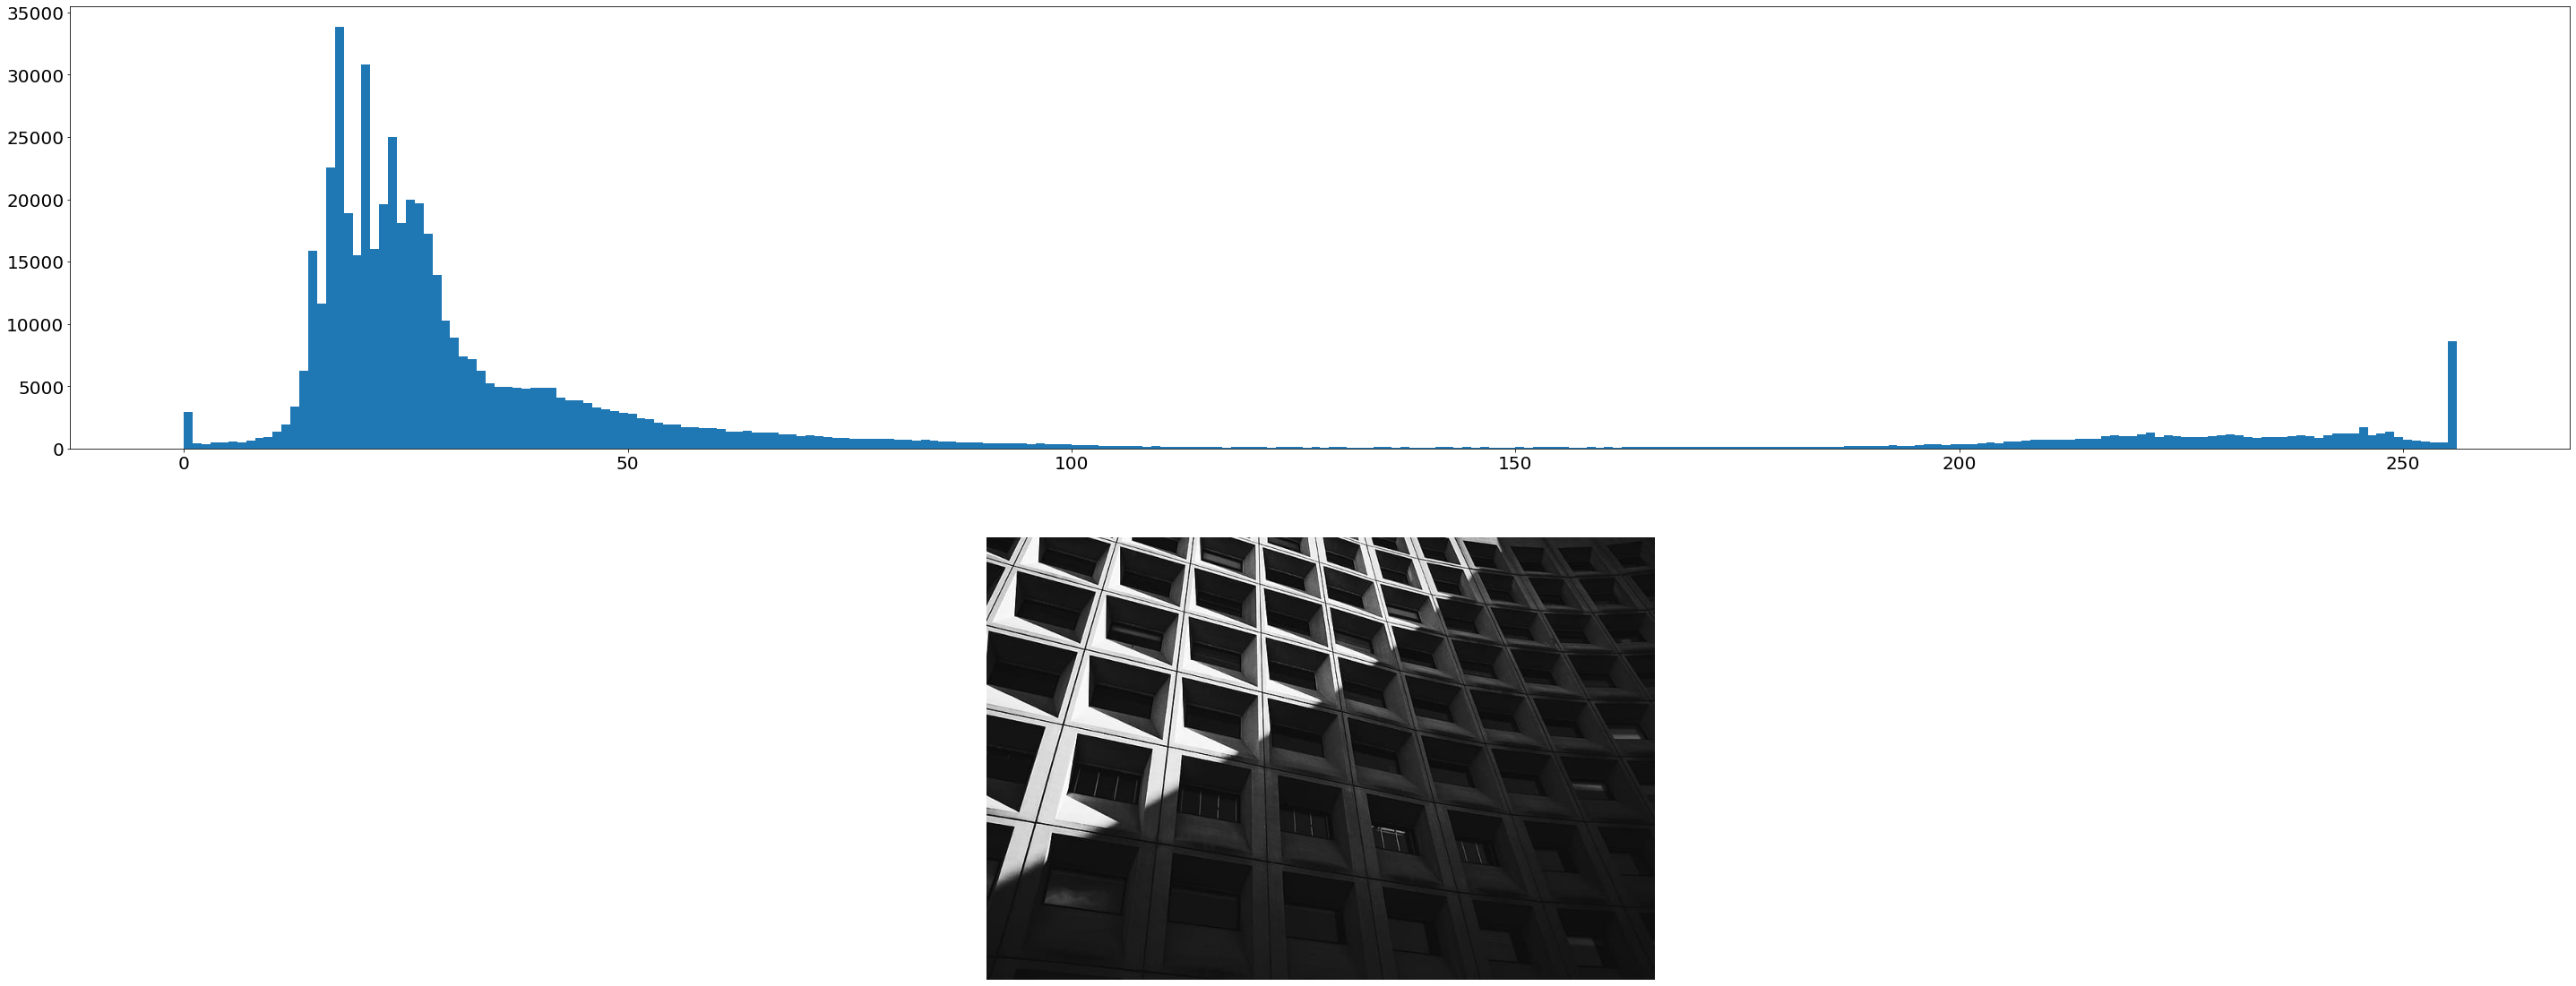

In [ ]:
dgedung = util.img_as_ubyte(color.rgb2gray(gedung));
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(50, 20))
plt.subplot(2,1,1);
plt.hist(dgedung.flatten(),256,range=(0,256))

plt.subplot(2,1,2); plt.axis("off");
plt.imshow(dgedung,cmap="gray");
plt.show()

## b. Lakukan ​histogram equalization​ terhadap citra tersebut kemudian tampilkan histogramnya

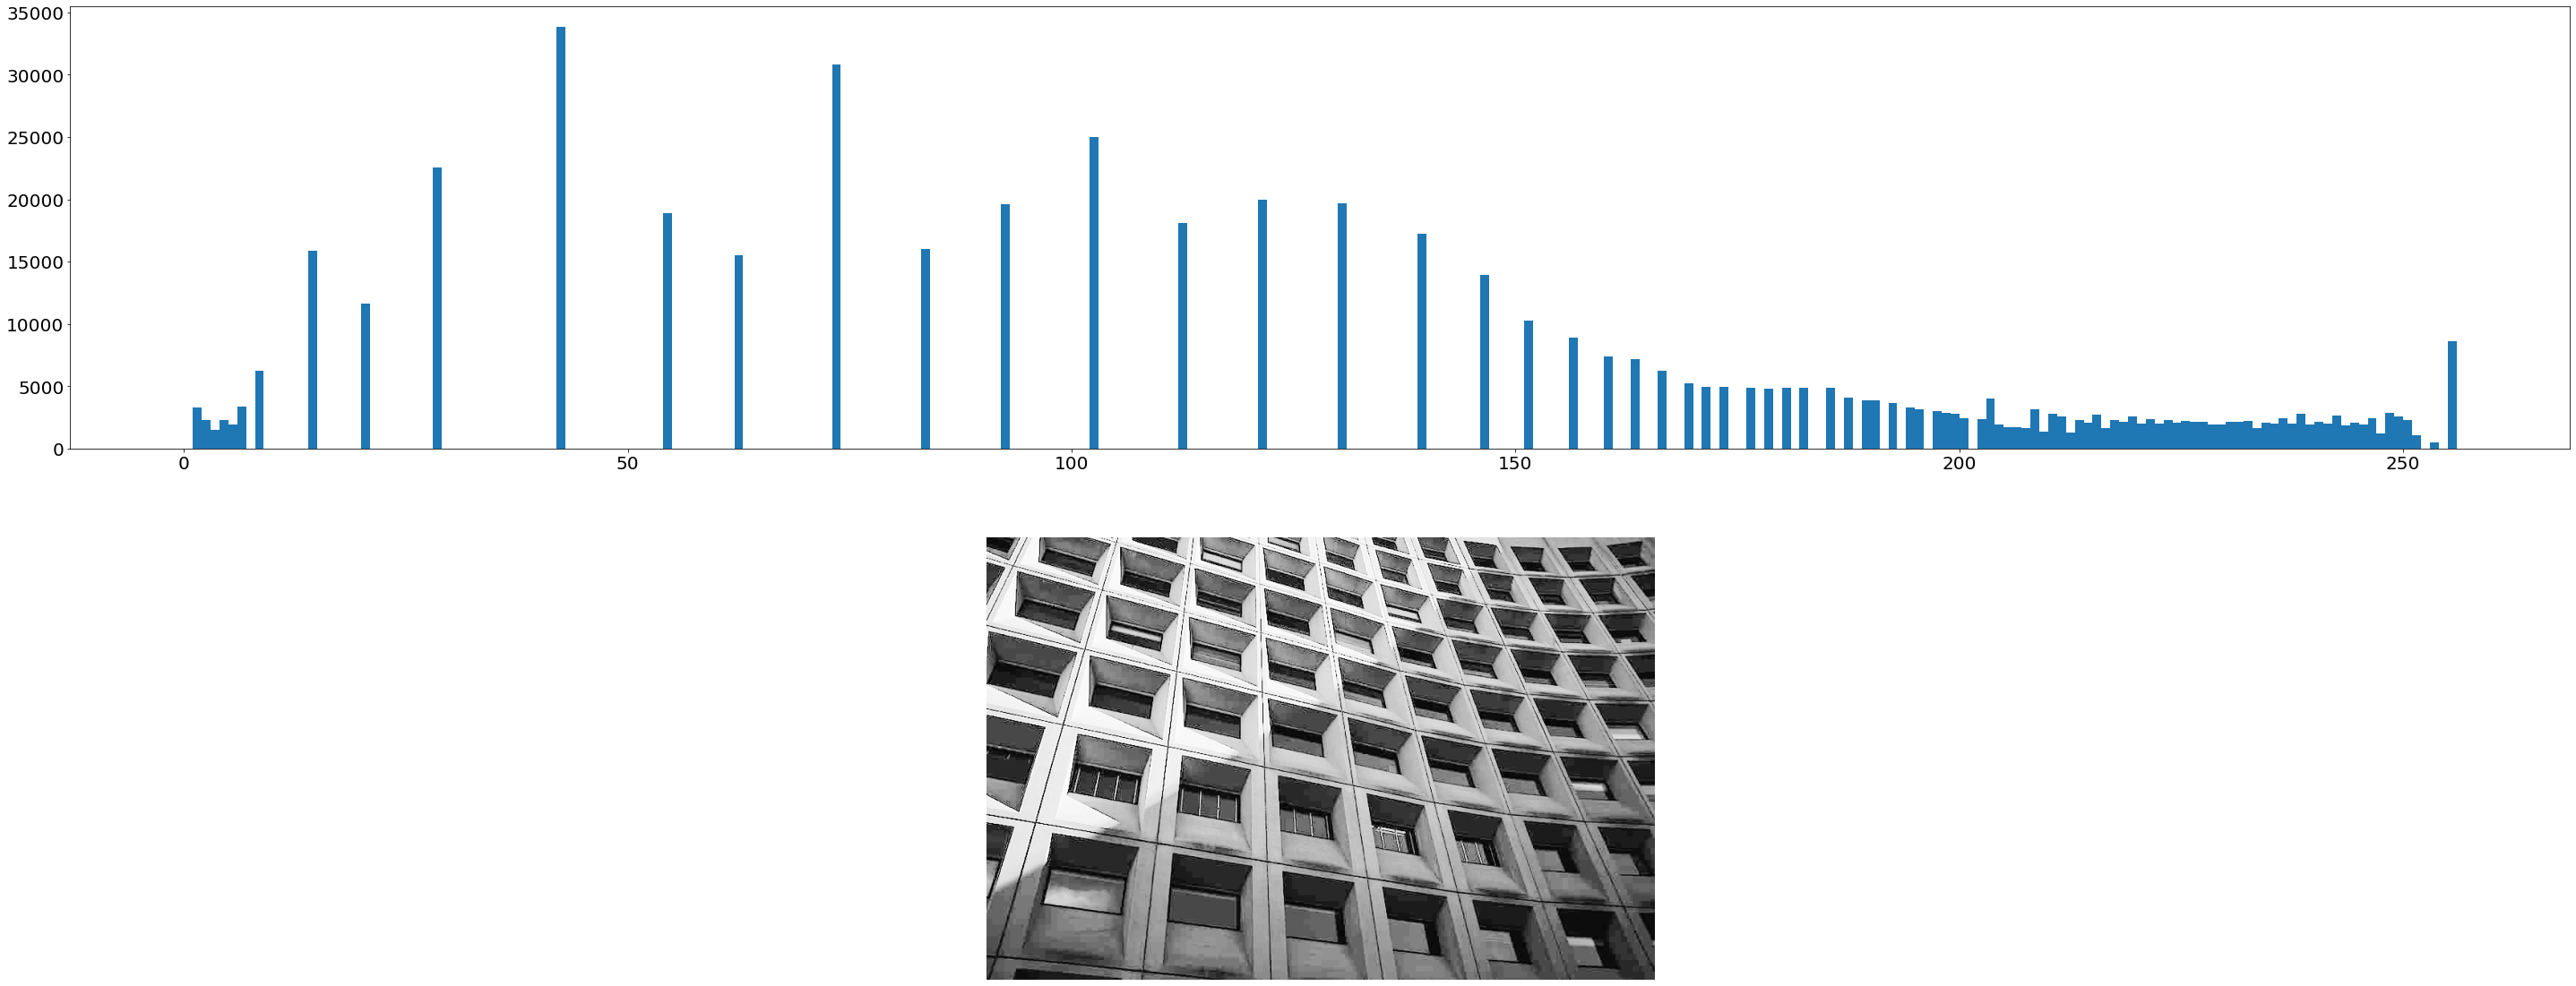

In [ ]:
eqgedung = exposure.equalize_hist(color.rgb2gray(gedung))
eqgedung=util.img_as_ubyte(color.rgb2gray(eqgedung))
plt.figure(figsize=(50, 20))
plt.subplot(2,1,1)
plt.hist(eqgedung.flatten(),256,range=(0,256))

plt.subplot(2,1,2);plt.axis("off");
plt.imshow(eqgedung,cmap="gray")
plt.show()


## c. Lakukan ​contrast stretching ​terhadap citra asli kemudian tampilkan histogramnya.

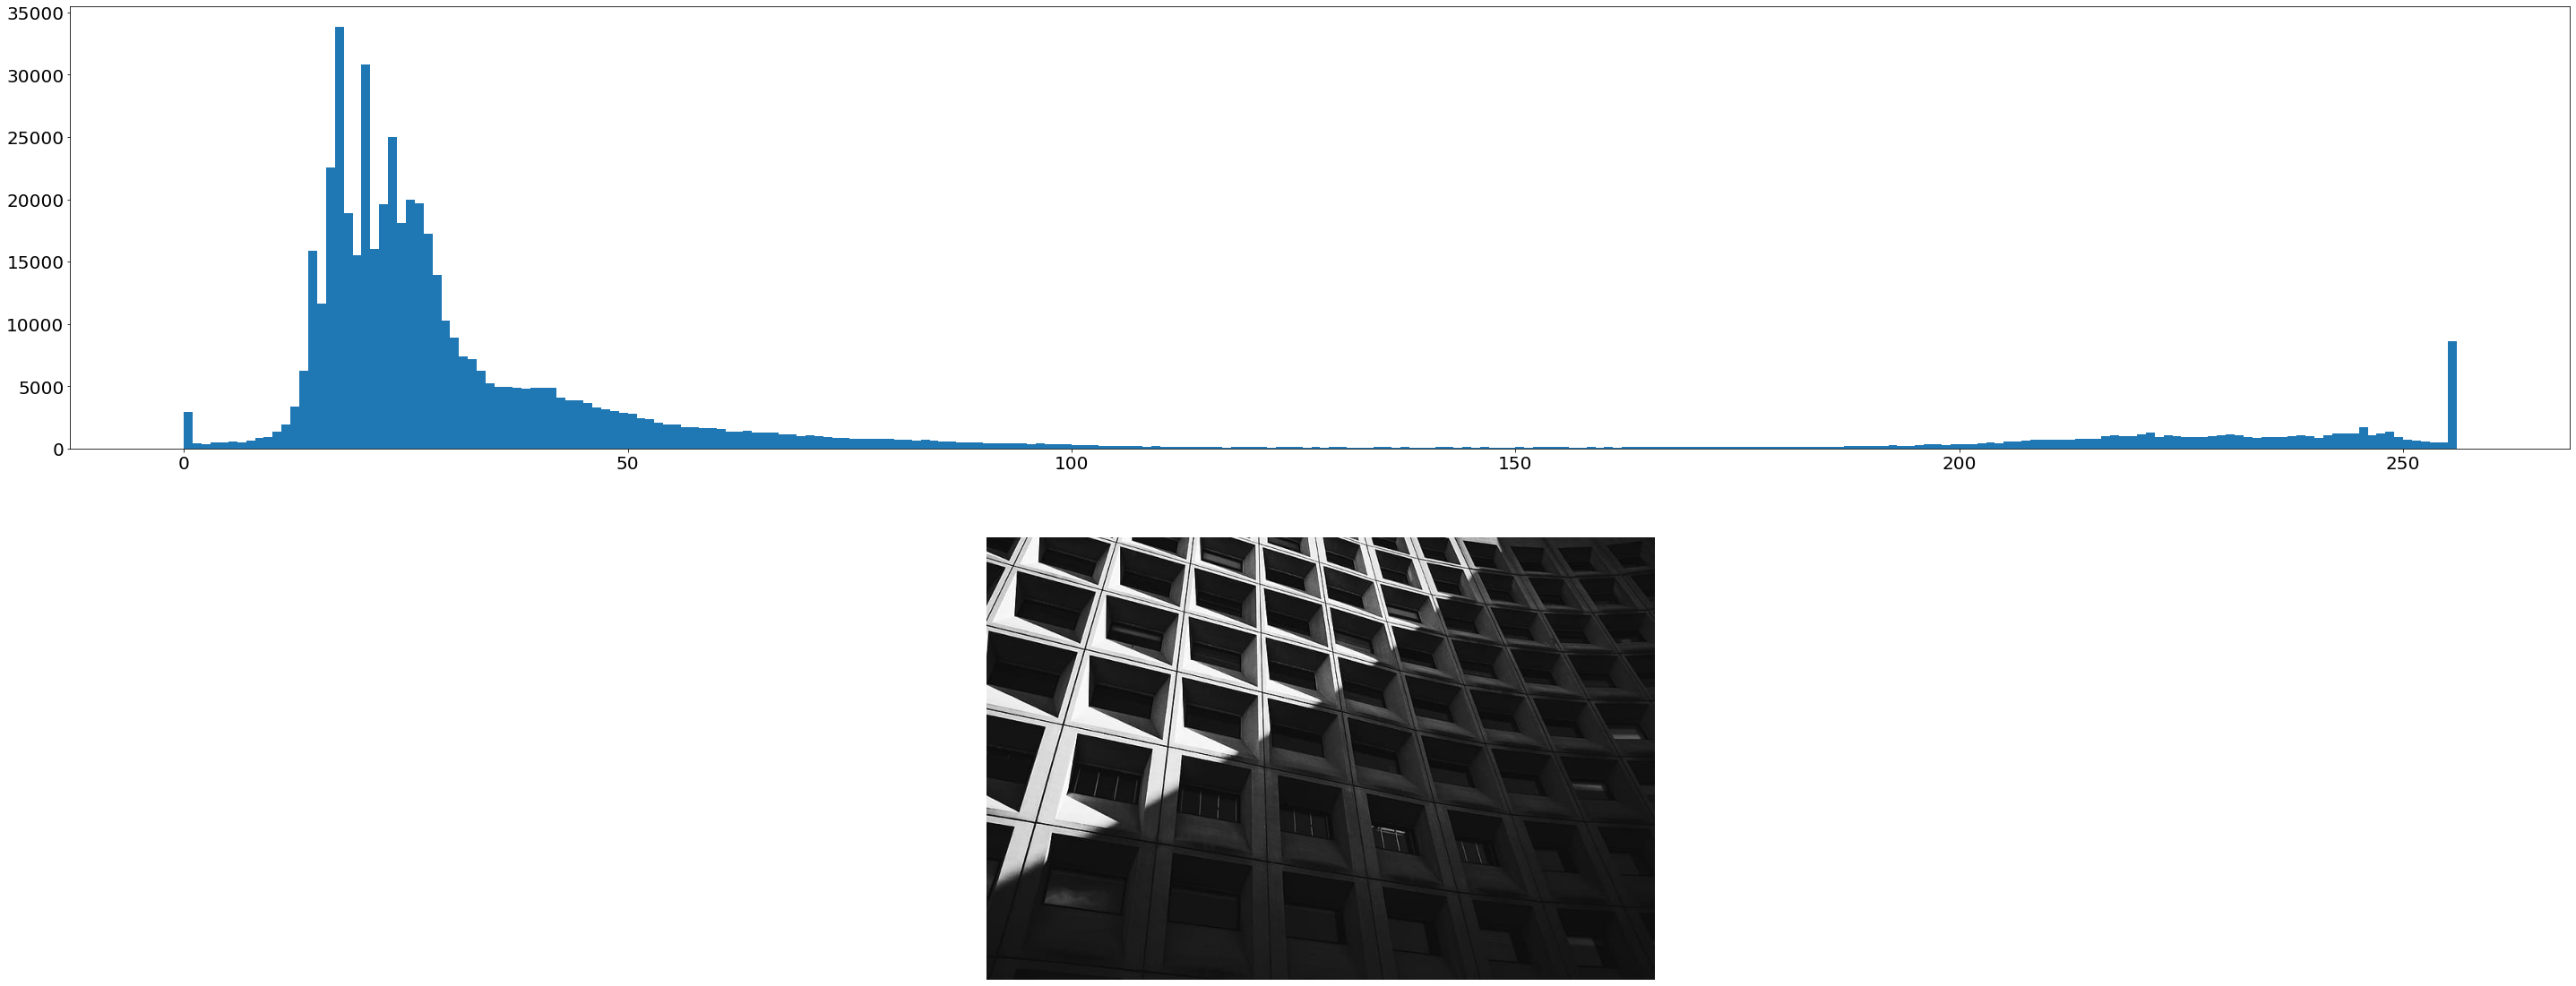

In [ ]:
mn = min(gedung.flatten())
mx = max(gedung.flatten())
b = int(np.floor(255 / (mx - mn)))
gedung_cs = (gedung - mn) * b
gedung_cs=util.img_as_ubyte(color.rgb2gray(gedung_cs))
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(50, 20))
plt.subplot(2,1,1)
plt.hist(gedung_cs.flatten(),256,range=(0,256))
plt.subplot(2,1,2);plt.axis("off");
plt.imshow(gedung_cs,cmap="gray")
plt.show()


## d. Coba ceritakan perbedaan apa yang dapat anda temukan antara metode ​histogram equalization dan ​contrast stretching

Perbedaan pertama:
1. Contrast Streching tidak dapat berkerja untuk citra yang penyebarannya telah rata dari 0-255
2. memungkinkan area dengan kontras yang lebih rendah untuk mendapatkan kontras yang lebih tinggi, namun penyebaran dari intensitas terlihat 

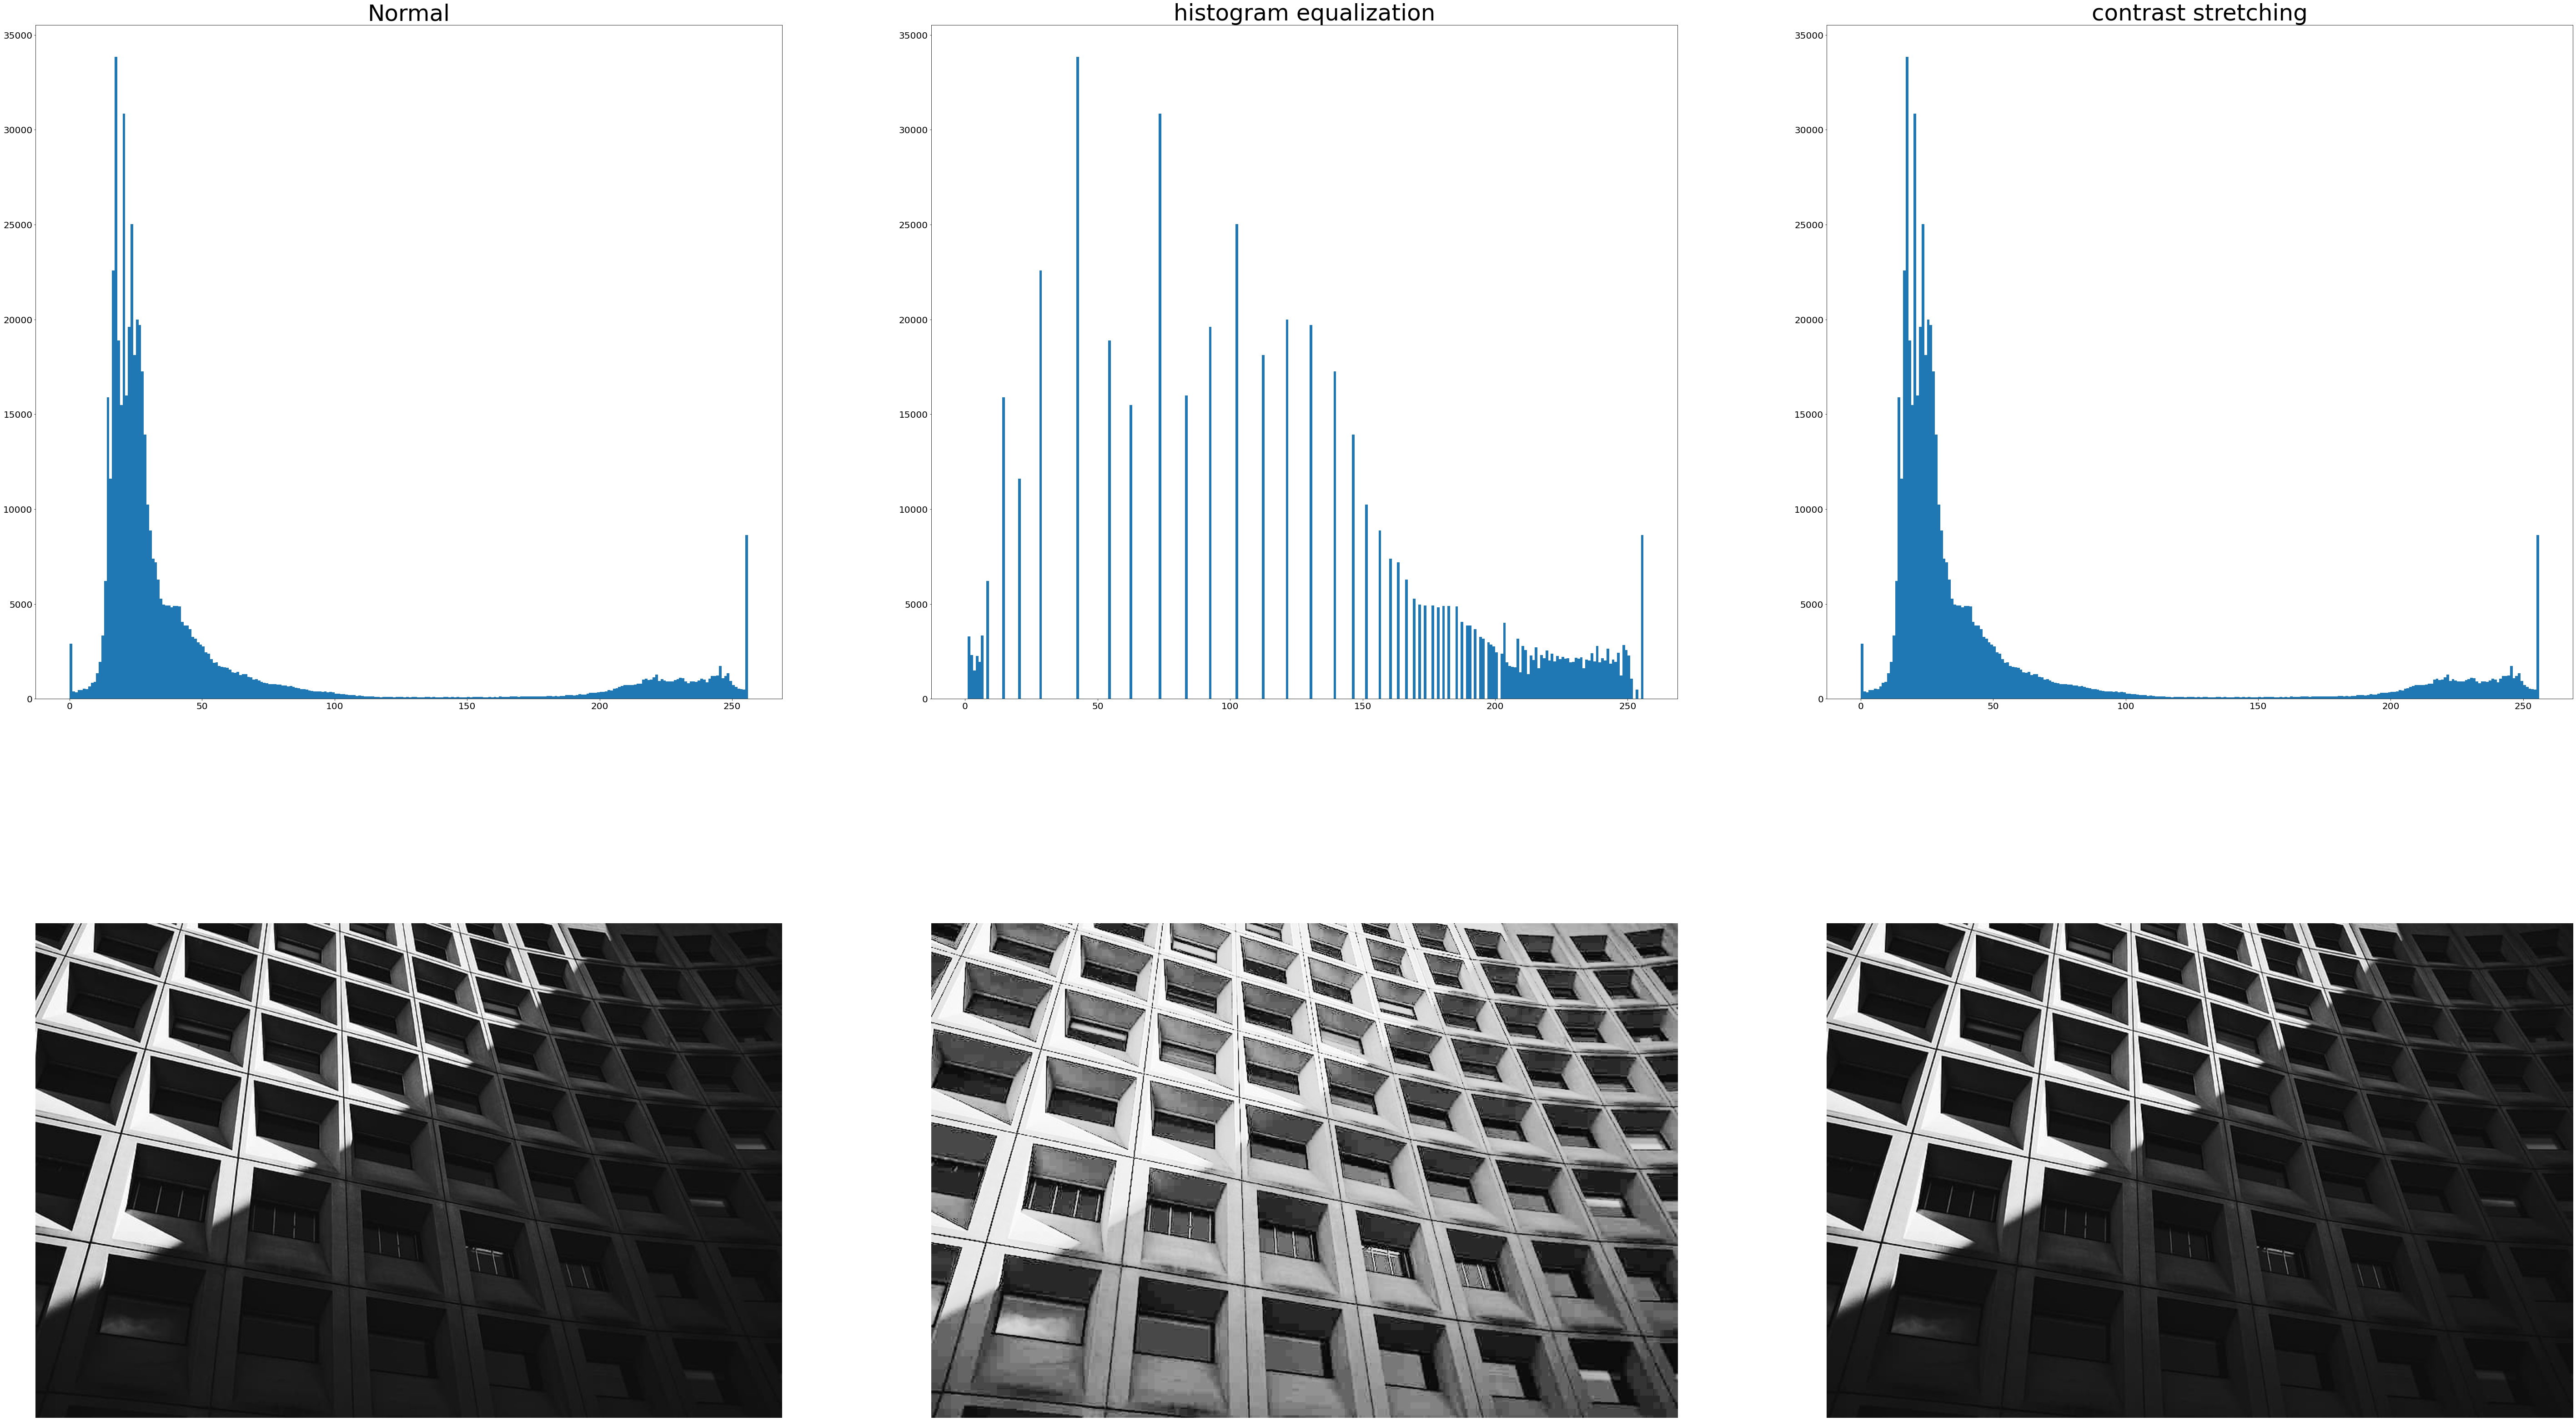

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(100,60))
axs[0,0].hist(dgedung.flatten(),256,range=(0,256))
axs[0,0].set_title("Normal",fontsize=50)
axs[0,1].hist(eqgedung.flatten(),256,range=(0,256))
axs[0,1].set_title("Histogram equalization",fontsize=50)
axs[0,2].hist(dgedung_cs.flatten(),256,range=(0,256))
axs[0,2].set_title("Contrast stretching",fontsize=50)
axs[1,0].imshow(dgedung,cmap="gray")
axs[1,0].axis('off')
axs[1,1].imshow(eqgedung,cmap="gray")
axs[1,1].axis('off')
axs[1,2].imshow(dgedung_cs,cmap="gray")
axs[1,2].axis('off')

plt.show()

# 2. Diberikan citra “bird.jpg” berukuran 484 x 700

## a. Gunakan Sobel ​spatial filter dan Prewitt ​spatial filter ​untuk menemukan dan menampilkan ​horizontal edge ​dari citra tersebut

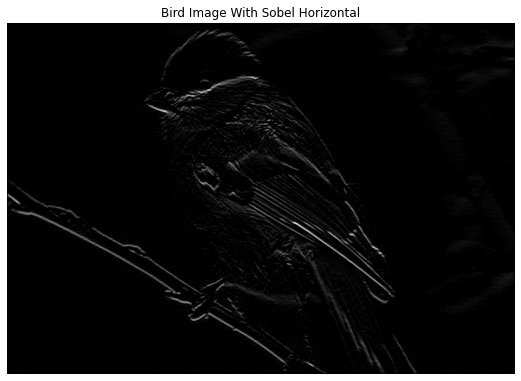

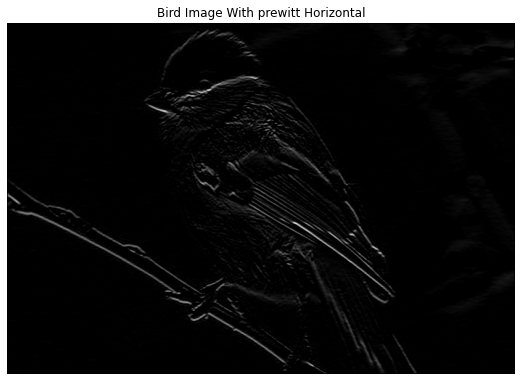

In [ ]:
# Gray
bird_sobelH_gray = util.img_as_ubyte(filters.sobel_h(color.rgb2gray(bird)))
bird_prewittH_gray = util.img_as_ubyte(filters.prewitt_h(color.rgb2gray(bird)))

DictImage_horizontal ={"Bird Image With Sobel Horizontal":bird_sobelH_gray,"Bird Image With prewitt Horizontal":bird_prewittH_gray}
showImg(DictImage_horizontal)



## b. Gunakan Sobel ​spatial filter dan Prewitt ​spatial filter ​untuk menemukan dan menampilkan ​vertical edge ​dari citra tersebut


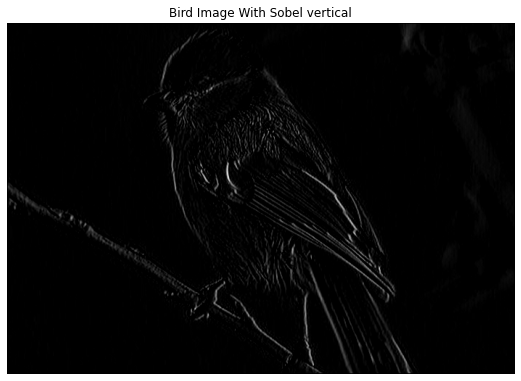

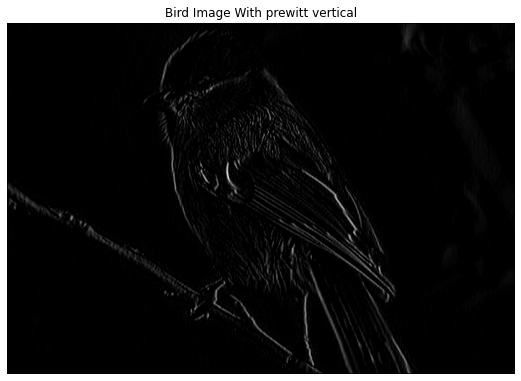

In [ ]:
# Gray
bird_sobelV_gray = util.img_as_ubyte(filters.sobel_v(color.rgb2gray(bird)))
bird_prewittV_gray = util.img_as_ubyte(filters.prewitt_v(color.rgb2gray(bird)))

DictImage_vertical ={"Bird Image With Sobel vertical":bird_sobelV_gray,"Bird Image With prewitt vertical":bird_prewittV_gray}
showImg(DictImage_vertical)

## c. Berdasarkan hasil 2a. dan 2b. temukan dan tampilkan ​edge ​keseluruhan dari citra.

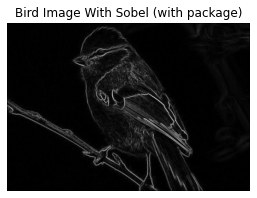

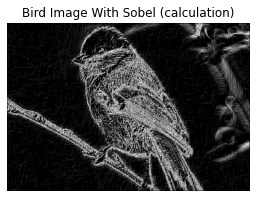

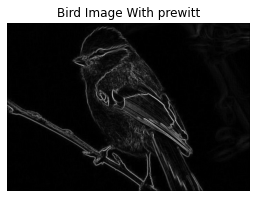

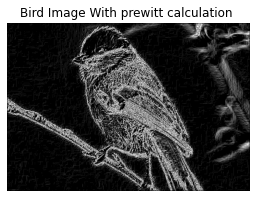

In [ ]:
# Gray
bird_sobel_gray = util.img_as_ubyte(filters.sobel(color.rgb2gray(bird)))
bird_prewitt_gray = util.img_as_ubyte(filters.prewitt(color.rgb2gray(bird)))
bird_sobel_g = np.sqrt(np.power(bird_sobelH_gray,2)+np.power(bird_sobelV_gray,2))
bird_sobel_g = bird_sobel_g.astype(np.ubyte)
bird_prewitt_g = np.sqrt(bird_prewittH_gray*bird_prewittH_gray+bird_prewittV_gray*bird_prewittV_gray)
bird_prewitt_g=bird_prewitt_g.astype(np.ubyte)

DictImage_all ={"Bird Image With Sobel (with package)":bird_sobel_gray,"Bird Image With Sobel (calculation)":bird_sobel_g
                ,"Bird Image With prewitt":bird_prewitt_gray,"Bird Image With prewitt calculation ":bird_prewitt_g}
showImg(DictImage_all)

#Comment

# 3. Diberikan gambar “noisy_statue.jpg” sebagai berikut:

In [ ]:
noisy_statue = io.imread("/content/drive/My Drive/LAB-PENGCIT/Tugas Lab 1 - Images/Citra Lab 1/noisy_statue.jpg")

## a. Terapkan ​median filter ​pada citra tersebut dengan ukuran kernel 9x9



/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


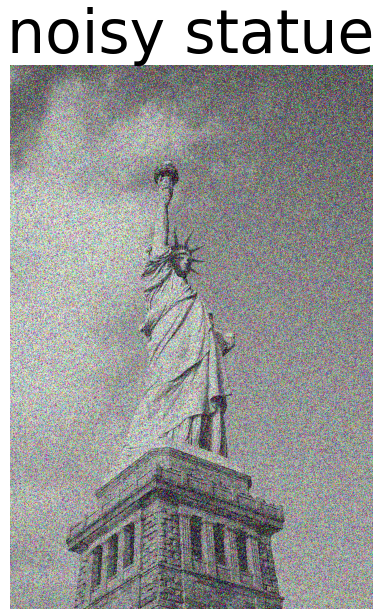

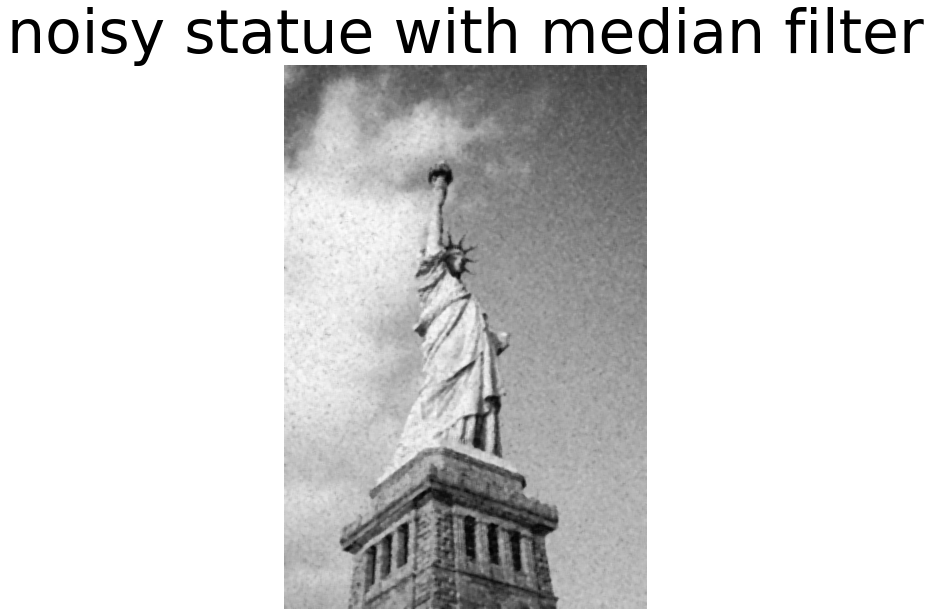

In [ ]:
median_Filter = filters.rank.median(color.rgb2gray(noisy_statue),selem = morphology.square(9))
dictMedianFilter = {"noisy statue":noisy_statue,"noisy statue with median filter": median_Filter}
showImg(dictMedianFilter)

## b. Terapkan ​mean filter ​pada citra tersebut dengan ukuran kernel 9x9

/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


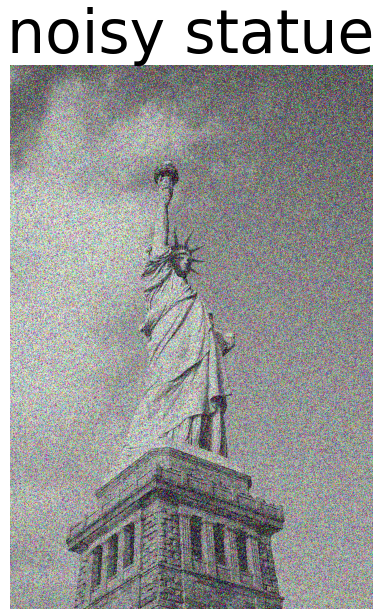

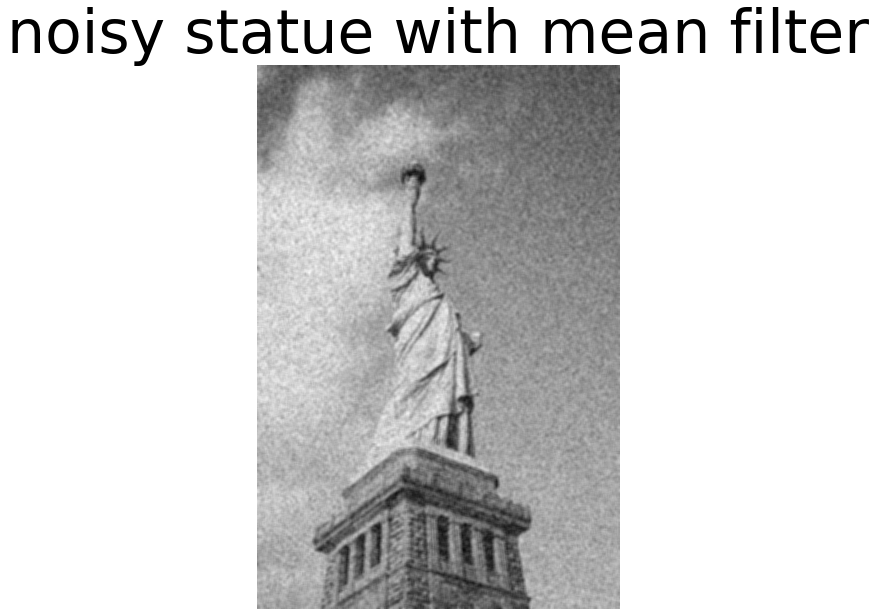

In [ ]:
mean_Filter = filters.rank.mean(color.rgb2gray(noisy_statue),selem = morphology.square(9))
dictMeanFilter = {"noisy statue":noisy_statue,"noisy statue with mean filter": mean_Filter}
showImg(dictMeanFilter)

## c. Ceritakan perbedaan citra yang dihasilkan pada soal 3a. dan 3b. Filter manakah yang hasilnya lebih baik menurut Anda? Berikan pula alasannya.